In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() #28x28 images of hand-written numbers from 0 to 9

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() #most common model, everything goes in direct order
model.add(tf.keras.layers.Flatten()) #inpout layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #128 (28x28) units hidden layer with relu function as a activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #10 (0-9) units output layer

model.compile(optimizer='adam', #default optimizer
              loss='sparse_categorical_crossentropy', #good for classification task
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3) #training

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss) # model's loss (error)
print(val_acc)  # model's accuracy

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2650 - accuracy: 0.9216
Epoch 2/3
60000/60000 [==============================] - 9s 151us/sample - loss: 0.1083 - accuracy: 0.9665
Epoch 3/3
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0727 - accuracy: 0.9771
10000/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09355035908566788
0.9718
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [ ]:
model.save('epic_num_reader.model')

In [4]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)

[[1.78492812e-07 9.02384514e-08 1.76121666e-05 ... 9.99942541e-01
  1.05241988e-07 4.81237339e-06]
 [1.46281218e-08 4.78135422e-03 9.93764758e-01 ... 7.48751994e-09
  6.68141240e-08 1.33433586e-09]
 [8.24032398e-08 9.99653578e-01 1.83175780e-05 ... 1.41420926e-04
  7.73456413e-05 1.12067237e-05]
 ...
 [9.32311339e-10 2.44736725e-07 1.52993280e-08 ... 1.90615519e-05
  1.08408486e-07 9.52673290e-05]
 [2.10550610e-07 3.87645741e-07 1.41178219e-07 ... 1.46539355e-06
  3.05913482e-03 1.34178455e-08]
 [1.05417746e-06 1.03221794e-07 1.16355267e-07 ... 1.65519723e-10
  2.68819718e-07 1.84917326e-07]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

print(np.argmax(predictions[0]))


7


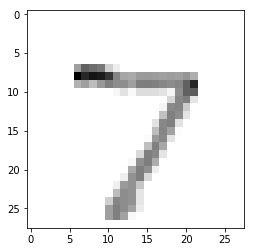

In [7]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()